<a href="https://colab.research.google.com/github/Abahski/Data-Science/blob/main/Project_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Kali ini saya akan mencoba memprediksi biaya pengobatan masing-masing pasien berdasarkan beberapa faktor. Namun faktor yang digunakan bukan faktor-faktor dari diagnosa penyakit, melainkan infromasi secara umum dari masing-masing pasien.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DSU/Tugas Akhir/insurance.csv')

In [28]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

In [42]:
data1 = data.copy()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
for d in data1.select_dtypes(include='object'):
  print(d,' : ',data1[d].unique())

sex  :  ['female' 'male']
smoker  :  ['yes' 'no']
region  :  ['southwest' 'southeast' 'northwest' 'northeast']


In [44]:
data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Ternyata tidak ada data 'null' dari data di atas, sehingga tidak perlu proses mengisi missing value pada data tersebut.

1338


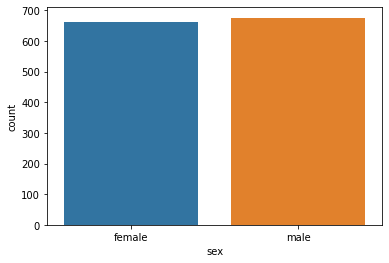

In [45]:
sns.countplot(data1['sex'])
print(data1['sex'].count())

Jumlah pasien laki-laki dan perempuan kurang lebih hampir sama, bisa diartikan bahwa jenis kelamin tidak mempengaruhi imun tubuh dari penyakit.

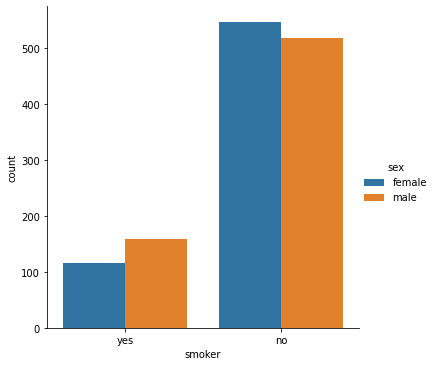

In [46]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=data1)

Jumlah pasien yang tidak merokok lebih banyak dari pada yang merokok. Dan juga jumlah perokok laki-laki lebih banyak dari pada perokok perempuan. Dari grafik di atas juga bisa diartikan pasien yang tidak merokok lebih rentan terhadap penyakit.

Text(0.5, 1.0, 'Persebaran Pengeluaran Untuk Non-Perokok')

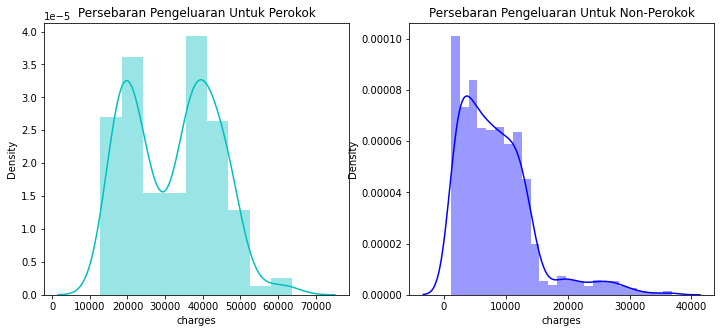

In [47]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data1[(data1.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Persebaran Pengeluaran Untuk Perokok')

ax=f.add_subplot(122)
sns.distplot(data1[(data1.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Persebaran Pengeluaran Untuk Non-Perokok')

Meski jumlah non-perokok lebih banyak dari jumlah perokok, ternyata perokok lebih banyak mengeluarkan uang untuk pengobatan dari pada yang tidak merokok.

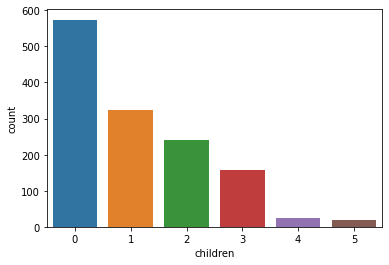

In [48]:
sns.countplot(data1['children'])

Sebagian besar pasien tidak memiliki anak. Sekarang mari kita lihat apakah pasien yang memiliki anak termasuk perokok apa tidak.

Text(0.5, 1.0, 'Perokok dan Non-Perokok yang Memiliki Anak')

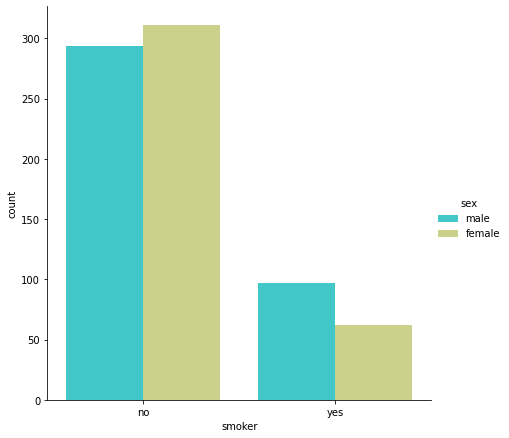

In [49]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Perokok dan Non-Perokok yang Memiliki Anak')

Sungguh sedih masih ada orang pasien yang memiliki anak masih merokok. Tetapi saya cukup senang jumlah pasien yang memiliki anak tapi tidak merokok lebih banyak dari yang merokok.

Text(0.5, 1.0, 'Pasien Memiliki Anak 2')

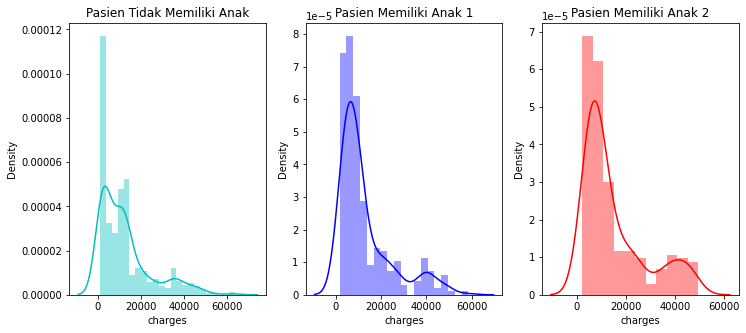

In [50]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(131)
sns.distplot(data1[(data1.children == 0)]["charges"],color='c',ax=ax)
ax.set_title('Pasien Tidak Memiliki Anak')

ax=f.add_subplot(132)
sns.distplot(data1[(data1.children == 1)]['charges'],color='b',ax=ax)
ax.set_title('Pasien Memiliki Anak 1')

ax=f.add_subplot(133)
sns.distplot(data1[(data1.children == 2)]['charges'],color='r',ax=ax)
ax.set_title('Pasien Memiliki Anak 2')

Text(0.5, 1.0, 'Pasien Memiliki Anak 5')

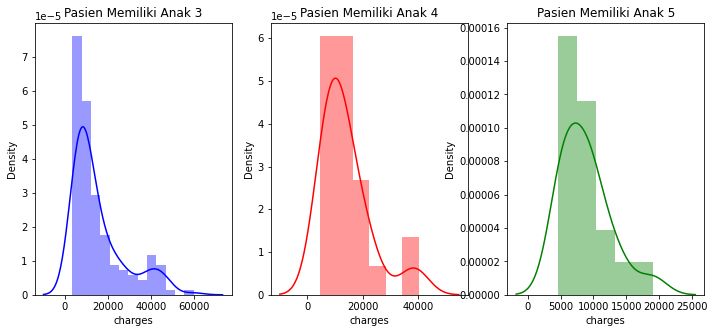

In [51]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(131)
sns.distplot(data1[(data1.children == 3)]['charges'],color='b',ax=ax)
ax.set_title('Pasien Memiliki Anak 3')

ax=f.add_subplot(132)
sns.distplot(data1[(data1.children == 4)]['charges'],color='r',ax=ax)
ax.set_title('Pasien Memiliki Anak 4')

ax=f.add_subplot(133)
sns.distplot(data1[(data1.children == 5)]['charges'],color='g',ax=ax)
ax.set_title('Pasien Memiliki Anak 5')

Semakin banyak pasien memiliki anak maka semakin besar biaya pengobatan. Sekarang mari kita lihat persebaran region dari masing-masing pasien.

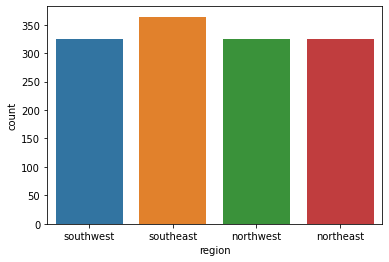

In [52]:
sns.countplot(data1['region'])

Persebaran pasien cukup merata dari masing-masing daerah. Tetapi, apakah daerah mempengaruhi besar kecilnya biaya pengobatan? Mari kita lihat.

Text(0.5, 1.0, '')

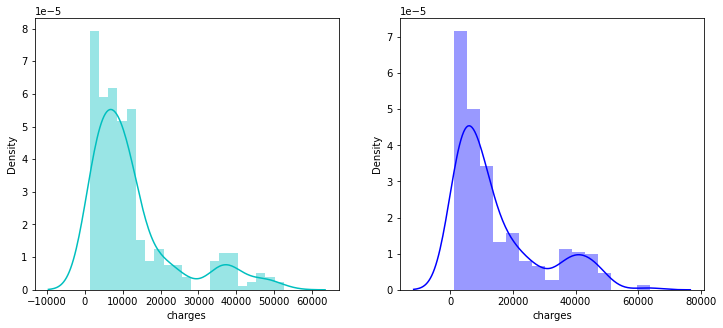

In [53]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data1[(data1.region == 'southwest')]["charges"],color='c',ax=ax)
ax.set_title('')

ax=f.add_subplot(122)
sns.distplot(data1[(data1.region == 'southeast')]['charges'],color='b',ax=ax)
ax.set_title('')

Text(0.5, 1.0, '')

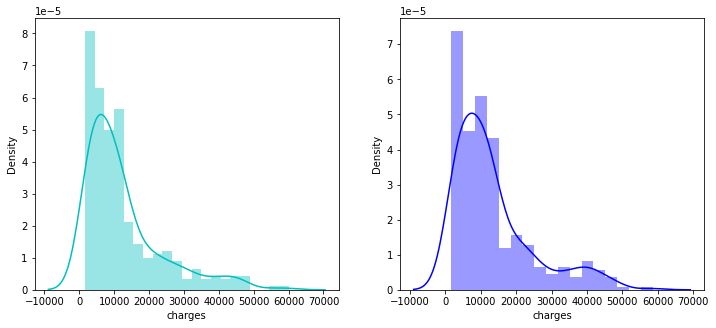

In [54]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data1[(data1.region == 'northwest')]["charges"],color='c',ax=ax)
ax.set_title('')

ax=f.add_subplot(122)
sns.distplot(data1[(data1.region == 'northeast')]['charges'],color='b',ax=ax)
ax.set_title('')

Bisa disimpulkan bahwa daerah tidak mempengaruhi besar kecilnya biaya pengobatan dari masing-masing pasien. Fitur ini mungkin akan dihapus karena tidak begitu berpengaruh. 

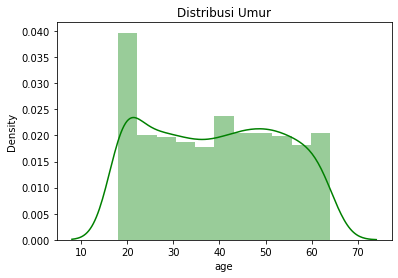

In [55]:
plt.title("Distribusi Umur")
sns.distplot(data1["age"], color = 'g')

In [56]:
data1['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

Dari persebaran umur pasien, bisa dilihat paling muda berumur 18 tahun dan paling tua berumur 64 tahun. Wah, umur muda sudah mengeluarkan biaya pengobatan.

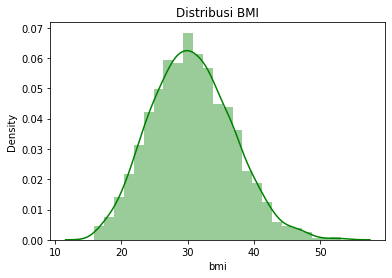

In [57]:
plt.title("Distribusi BMI")
sns.distplot(data1["bmi"], color = 'g')

In [58]:
data1['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Persebaran BMI cukup merata dana rata-rata BMI yang di dapat sebesar 30. Bagaiamana biaya pengobatan untuk pasien dengan BMI lebih dari 30 dan kurang dari 30?

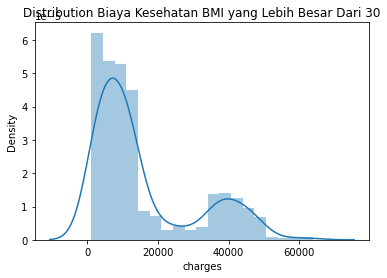

In [59]:
plt.title("Distribusi Biaya Kesehatan BMI yang Lebih Besar Dari 30")
ax = sns.distplot(data1[(data1.bmi >= 30)]['charges'])

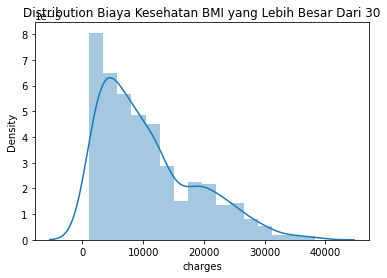

In [60]:
plt.title("Distribution Biaya Kesehatan BMI yang Lebih Besar Dari 30")
ax = sns.distplot(data1[(data1.bmi < 30)]['charges'])

Pasien dengan BMI lebih dari 30 lebih banyak mengeluarkan biaya pengobatan.

## *Preprocessing*

In [23]:
data2 = data1.copy()

Untuk *preprocessing* pertama-tama kolom 'region' akan dihapus terlebih dahulu.

In [24]:
data2 = data2.drop(['region'], axis=1)

Setelah itu karena di kolom umur memiliki umur yang beragam, maka akan dilakukan pengelompokan umur secara kategorik. Pengelompokan dibagi menjadi tiga, yaitu:


1. 18 - 35 tahun 
2. 36 - 56 tahun
3. 56 tahun ke atas



In [25]:
def konversi(age):
  if age >= 18 & age < 36:
    return 1
  elif age >= 36 & age < 56:
    return 2
  else:
    return 3

data2['age'] = data2['age'].apply(konversi)

Selnjutnya sex dan smoker juga akan ditransformasikan dalam bentuk biner untuk mempermudah proses komputasi.

In [26]:
ordinal = {
        'sex' : {'female':1, 'male':0},
         'smoker' : {'yes':1, 'no':0}
         }

data2.replace(ordinal, inplace=True)

In [27]:
data2.head()

,age,sex,bmi,children,smoker,charges
0,1,1,27.900,0,1,16884.92400
1,1,0,33.770,1,0,1725.55230
2,1,0,33.000,3,0,4449.46200
3,1,0,22.705,0,0,21984.47061
4,1,0,28.880,0,0,3866.85520


## Prediksi

Pada proses ini menggunakan klasifikasi yaitu Random Forrest Regressor. Yang berbeda dari Random Forest dan Random Forest Regressor adalah bentuk klasifikasinya. Jika klasifikasinya berupa binary maka akan digunakan Random Forest dan jika ternyata bukan binary maka termasuk dalam regresi, sehingga digunakanlah Random Forest Regressor.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [65]:
data_model = data2.copy()
y = data_model.pop('charges')
fitur = data_model.columns

x_train, x_test, y_train, y_test = train_test_split(data_model, y, test_size=0.2, random_state=27)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 5), (268, 5), (1070,), (268,))

Random Forest Regressor memiliki dua macam criterion atau fungsi yang digunakan untuk mengukur kualitas tree, yaitu MSE (Mean Squared Error) dan MAE (Mean Absolute Error). 

In [69]:
forest = RandomForestRegressor(n_estimators = 50,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 8069039.966, MSE test data: 51402644.469
R2 train data: 0.945, R2 test data: 0.651


Dari hasil di atas terlihat bahwa nilai MSE di data latih dan data uji cukup besar, menandakan terdapat perbedaan nilai cukup besar antara nilai yang diamati dan nilai yang diprediksi. Tetapi nilai R2 cukup besar yang menandakan bahwa variabel di data tersebut memiliki korelasi yang cukup kuat. 

Lalu bagaimana bentuk scatter plot dari hasil di atas? Mari kita lihat hasilnya di bawah ini.

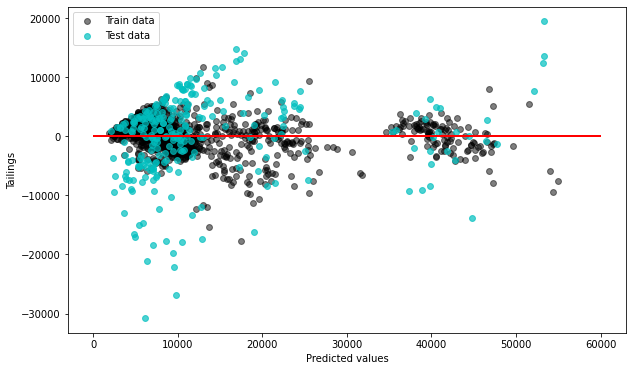

In [67]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

Cukup bagus, tetapi ada beberapa titik yang jauh dari kumpulan titik lainnya. Terutama pada data latih.

### Kesimpulan

Dari hasil di atas bisa kita lihat Random Forrest Regressor cukup baik dalam memprediksi biaya pengobatan masing-masing pasien. Meski begitu perbedaan nilai MSE cukup besar, hal ini bisa diatasi jika kita menggunakan criterion MAE. Bisa saja hasilnya lebih baik dari criterion MSE.